[Порог на время контака](#1488)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
c3151w=pd.read_csv('lipid_data/c315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
c3151w.columns = list(i for i in range(0, 11))
c3151w[10] = c3151w[10].apply(lambda x:x[1:]).astype(float)
c3151w['system']='c315.1.w'
c3151w = c3151w.rename(columns={1:'lipid_number', 3:'lipid_type', 6: 'subunit', 8:'restype', 9:'residue', 10:'time_part'})

c3152w=pd.read_csv('lipid_data/c315.2.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
c3152w.columns = list(i for i in range(0, 11))
c3152w[10] = c3152w[10].apply(lambda x:x[1:]).astype(float)
c3152w['system']='c315.2.w'
c3152w = c3152w.rename(columns={1:'lipid_number', 3:'lipid_type', 6: 'subunit', 8:'restype', 9:'residue', 10:'time_part'})

ds3151w=pd.read_csv('lipid_data/ds315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
ds3151w.columns = list(i for i in range(0, 11))
ds3151w[10] = ds3151w[10].apply(lambda x:x[1:]).astype(float)
ds3151w['system']='ds315.1.w'
ds3151w = ds3151w.rename(columns={1:'lipid_number', 3:'lipid_type', 6: 'subunit', 8:'restype', 9:'residue', 10:'time_part'})

s3151w=pd.read_csv('lipid_data/s315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
s3151w.columns = list(i for i in range(0, 11))
s3151w[10] = s3151w[10].apply(lambda x:x[1:]).astype(float)
s3151w['system']='s315.1.w'
s3151w = s3151w.rename(columns={1:'lipid_number', 3:'lipid_type', 6: 'subunit', 8:'restype', 9:'residue', 10:'time_part'})

do3151w=pd.read_csv('lipid_data/do315.1.w_cont_dc_ft.csv', header=None, sep='\s+').drop(columns=5)
do3151w.columns = list(i for i in range(0, 11))
do3151w[10] = do3151w[10].apply(lambda x:x[1:]).astype(float)
do3151w['system']='do315.1.w'
do3151w = do3151w.rename(columns={1:'lipid_number', 3:'lipid_type', 6: 'subunit', 8:'restype', 9:'residue', 10:'time_part'})

In [6]:
data = pd.concat([c3151w, c3152w, ds3151w, s3151w, do3151w])

In [7]:
data

,0,lipid_number,2,lipid_type,4,5,subunit,7,restype,residue,time_part,system
0,4,53,0,POPC,1,1,1,591,MET,706,1.000000,c315.1.w
1,5,240,0,POPE,1,1,1,342,LEU,457,1.000000,c315.1.w
2,5,315,0,POPE,1,3,3,473,LEU,588,1.000000,c315.1.w
3,8,582,0,SMP,1,3,3,438,LEU,553,1.000000,c315.1.w
4,4,53,0,POPC,1,1,1,590,LYS,705,1.000000,c315.1.w
...,...,...,...,...,...,...,...,...,...,...,...,...
7328,4,149,0,POPC,1,1,1,132,LYS,246,0.000125,do315.1.w
7329,6,384,0,POPS,1,3,3,370,LEU,484,0.000125,do315.1.w
7330,4,149,0,POPC,1,1,1,135,PHE,249,0.000125,do315.1.w
7331,4,149,0,POPC,1,1,1,180,SER,294,0.000125,do315.1.w


In [19]:
data.to_csv('TRPV3_lipids_contacts.csv', index=False)

In [20]:
pd.read_csv('TRPV3_lipids_contacts.csv')

,0,lipid_number,2,lipid_type,4,5,subunit,7,restype,residue,time_part,system
0,4,53,0,POPC,1,1,1,591,MET,706,1.000000,c315.1.w
1,5,240,0,POPE,1,1,1,342,LEU,457,1.000000,c315.1.w
2,5,315,0,POPE,1,3,3,473,LEU,588,1.000000,c315.1.w
3,8,582,0,SMP,1,3,3,438,LEU,553,1.000000,c315.1.w
4,4,53,0,POPC,1,1,1,590,LYS,705,1.000000,c315.1.w
...,...,...,...,...,...,...,...,...,...,...,...,...
38535,4,149,0,POPC,1,1,1,132,LYS,246,0.000125,do315.1.w
38536,6,384,0,POPS,1,3,3,370,LEU,484,0.000125,do315.1.w
38537,4,149,0,POPC,1,1,1,135,PHE,249,0.000125,do315.1.w
38538,4,149,0,POPC,1,1,1,180,SER,294,0.000125,do315.1.w


In [7]:
# если вдруг все таки понадобится считать по интервалам
'''
left = list(range(data_all[9].min(), data_all[9].max() - 19, 19))
right = list(range(data_all[9].min() + 18, data_all[9].max(), 19))

data_all['interval']=0
for n in range(0, len(data_all)):
    if data_all[9][n] > 740:
            data_all.loc[n, 'interval'] = '741 - 758'
            continue
    for i, j in zip(left, right):
        if i <= data_all[9][n] <= j:
            data_all.loc[n, 'interval'] = str(i) + ' - ' + str(j)
            break
''''''

CPU times: user 1min 26s, sys: 1.75 s, total: 1min 28s
Wall time: 1min 44s


## Попробуем поставить порог на число взаимодействий

In [42]:
data_grouped.time_part.describe()

count    1561.000000
mean        0.896500
std         1.068588
min         0.000125
25%         0.025184
50%         0.413136
75%         1.439726
max         4.489001
Name: time_part, dtype: float64

In [75]:
data_grouped_threshold = data_grouped.loc[data_grouped.time_part['mean'] >= 3]

In [76]:
data_grouped_threshold

system residue time_part          
                            mean       std
56    c315.1.w     439  3.303712  0.180696
59    c315.1.w     442  3.458599  0.530517
60    c315.1.w     443  3.335021  0.350822
64    c315.1.w     447  4.106987  0.229552
66    c315.1.w     449  3.521779  0.143276
...        ...     ...       ...       ...
1385  s315.1.w     535  3.139858  0.150626
1388  s315.1.w     538  3.695663  0.577501
1439  s315.1.w     595  3.285527  0.648223
1497  s315.1.w     656  3.677509  0.998820
1529  s315.1.w     706  3.378015  0.554596

[102 rows x 4 columns]

In [47]:
data_grouped_threshold.system.unique()

array(['c315.1.w', 'c315.2.w', 'do315.1.w', 'ds315.1.w', 's315.1.w'],
      dtype=object)

<ipython-input-85-6465c2c41229>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


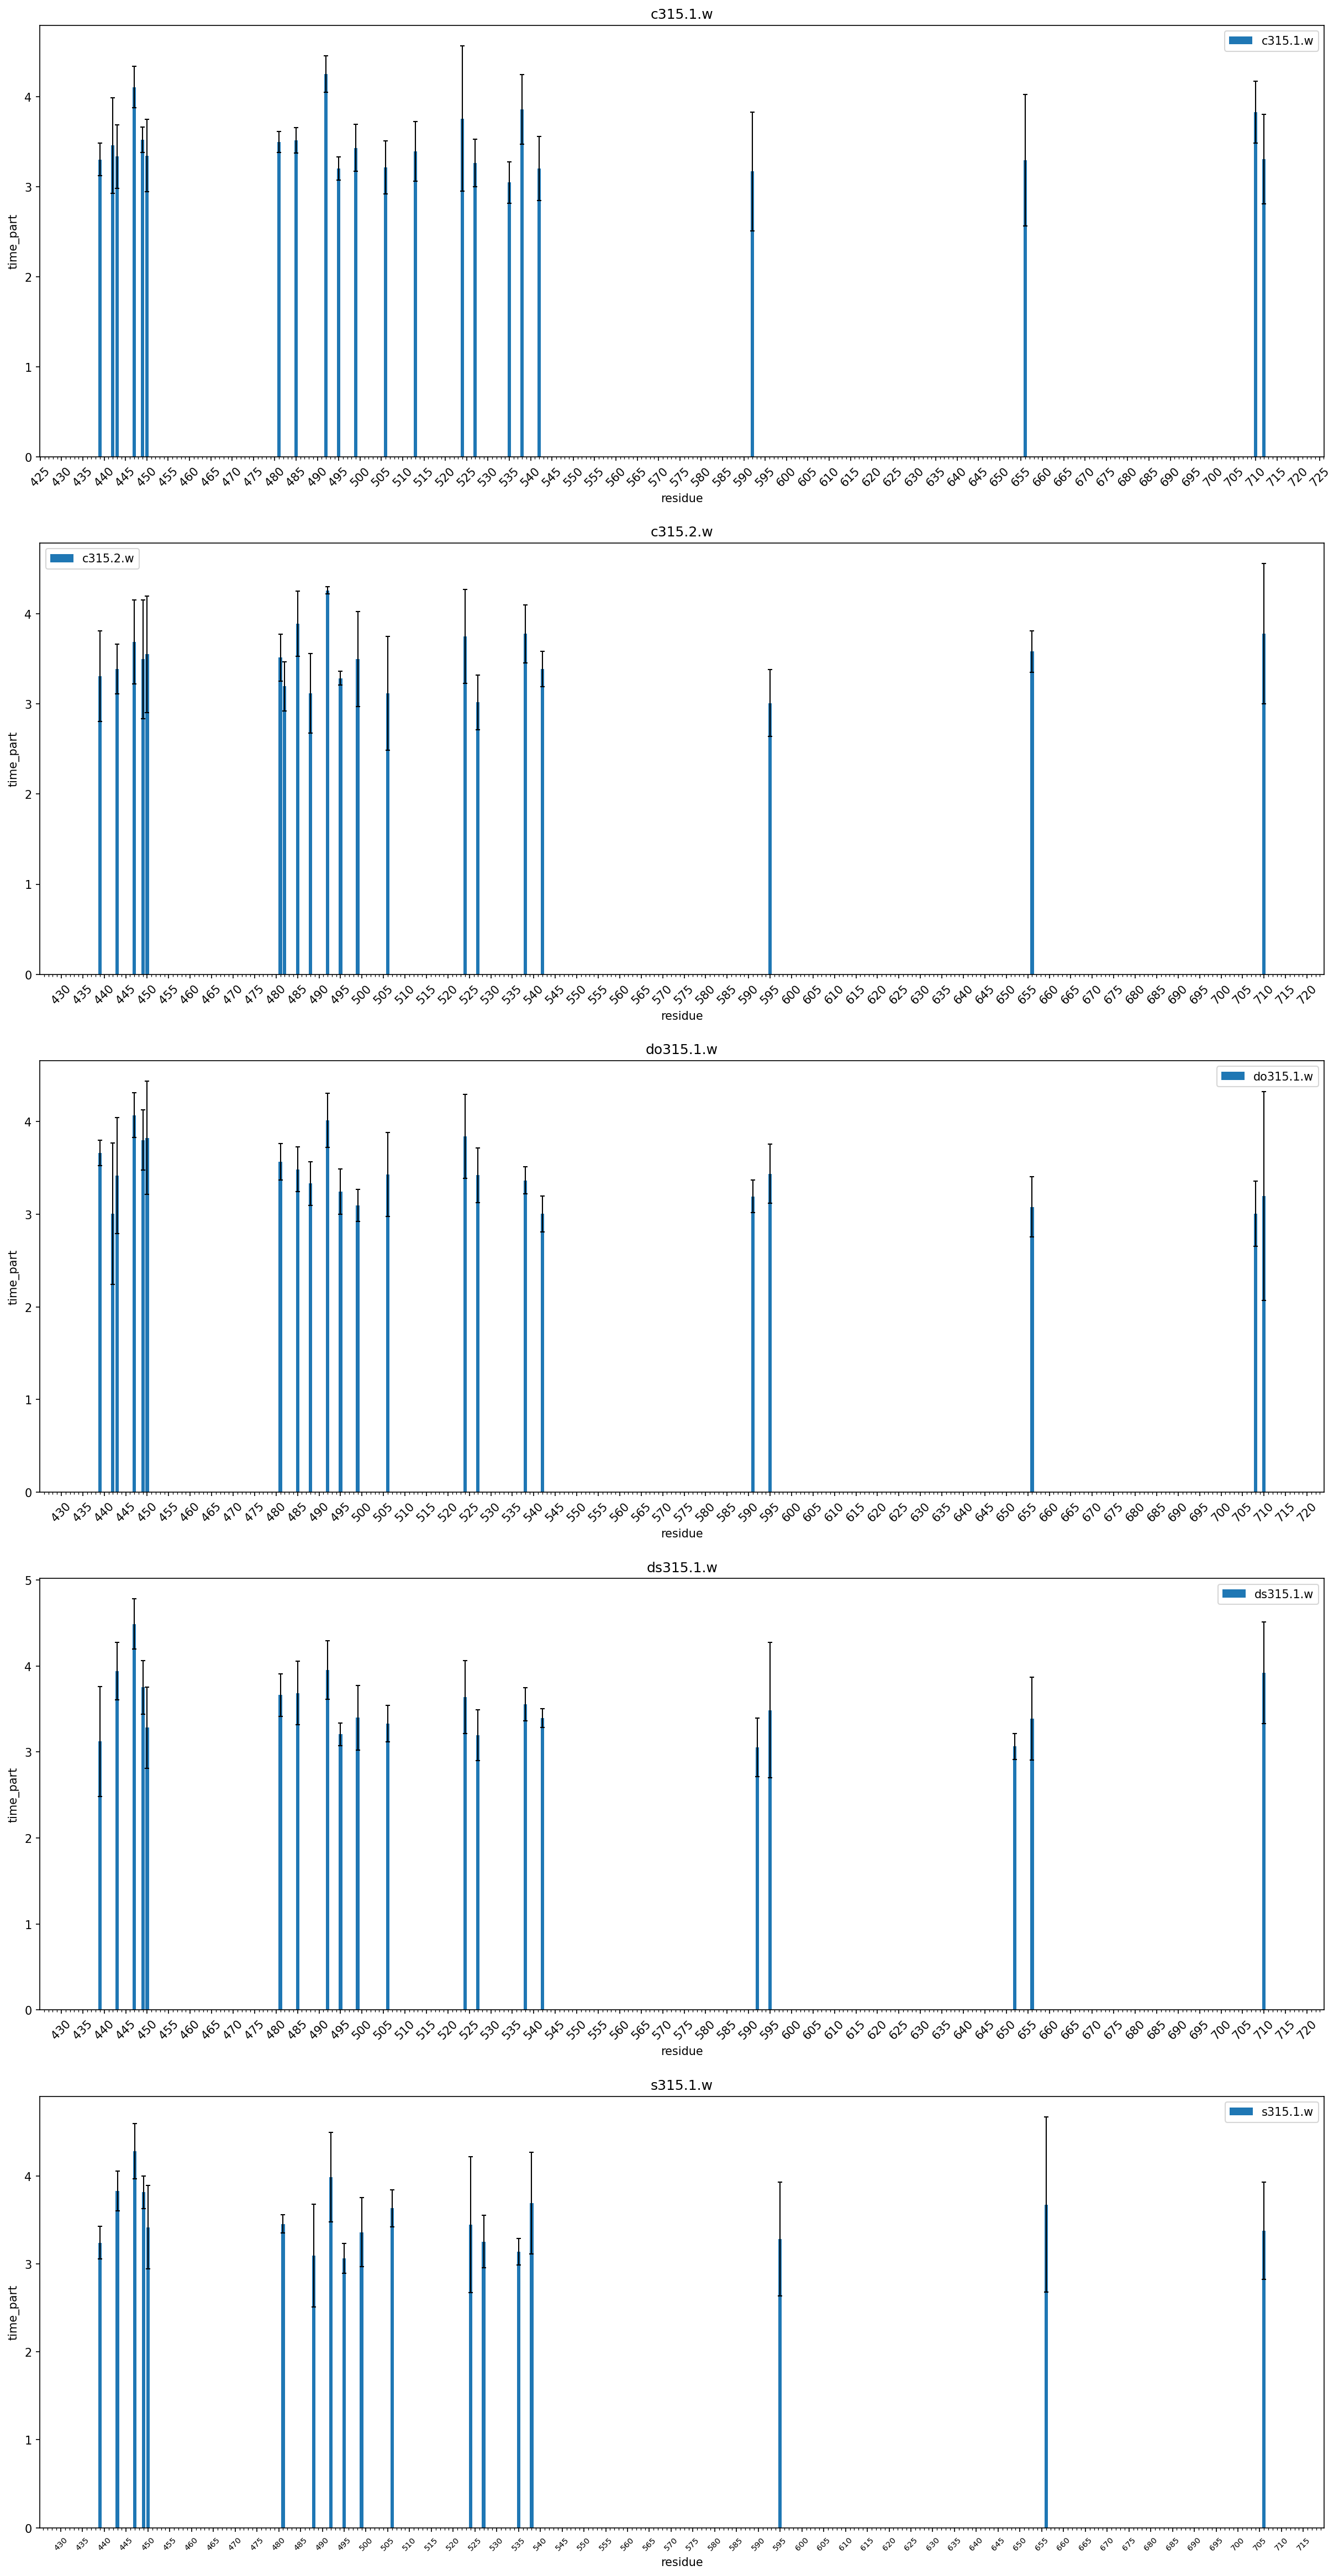

In [85]:
fig, ax = plt.subplots(nrows = 5, ncols = 1)
fig.set_figwidth(20)
fig.set_figheight(40)
fig.set_dpi(150)
plt.xticks(rotation=90, size=7)


for i, system in enumerate(data_grouped_threshold.system.unique()):
    system_data = data_grouped_threshold.loc[data_grouped_threshold.system == system]
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].bar(x = system_data.residue, 
                   height = system_data.time_part['mean'], 
                   label = system)
    ax[i].errorbar(x = system_data.residue, 
                   y = system_data.time_part['mean'], 
                   yerr = system_data.time_part['std'], 
                   fmt='none',
                   c = 'black', 
                   elinewidth = 1,
                   capsize = 2)  
    ax[i].legend()
    ax[i].set_xlabel('residue')
    ax[i].set_ylabel('time_part')
    ax[i].set_title(system)

fig.show()

<a id='1488'></a>

## Порог на время контакта



In [24]:
data.head()

,0,1,2,lipid_type,4,5,subunit,7,restype,residue,time_part,system
0,4,53,0,POPC,1,1,1,591,MET,706,1.0,c315.1.w
1,5,240,0,POPE,1,1,1,342,LEU,457,1.0,c315.1.w
2,5,315,0,POPE,1,3,3,473,LEU,588,1.0,c315.1.w
3,8,582,0,SMP,1,3,3,438,LEU,553,1.0,c315.1.w
4,4,53,0,POPC,1,1,1,590,LYS,705,1.0,c315.1.w


In [25]:
data.shape

(38540, 12)

In [26]:
# оставляем только контакты, которые более 75 процентов
data_threshold_time = data.loc[data.time_part >= 0.75]
print(data_threshold_time.shape)

(2624, 12)


для начала просуммируем по всем липидам и усредним по субъединицам

In [27]:
data_threshold_time_grouped = data_threshold_time.groupby(['system', 'subunit', 'restype', 'residue'], as_index=False) \
    .agg({'time_part':'sum'}) \
    .groupby(['system', 'residue', 'restype'], as_index=False) \
        .agg({'time_part':['mean','std']}).fillna(0)

In [28]:
print(data_threshold_time_grouped.shape)
print(data_threshold_time_grouped.time_part['mean'].min(),data_threshold_time_grouped.time_part['mean'].max())
data_threshold_time_grouped.head()

(721, 5)
0.7514060742407199 2.746719160104987


system residue restype time_part          
                                 mean       std
0  c315.1.w     397     THR  0.929759  0.000000
1  c315.1.w     398     THR  0.806774  0.000000
2  c315.1.w     399     THR  0.928134  0.000000
3  c315.1.w     400     ASP  0.928259  0.000000
4  c315.1.w     401     ASN  0.834208  0.112151

<ipython-input-17-14089cb17f9a>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


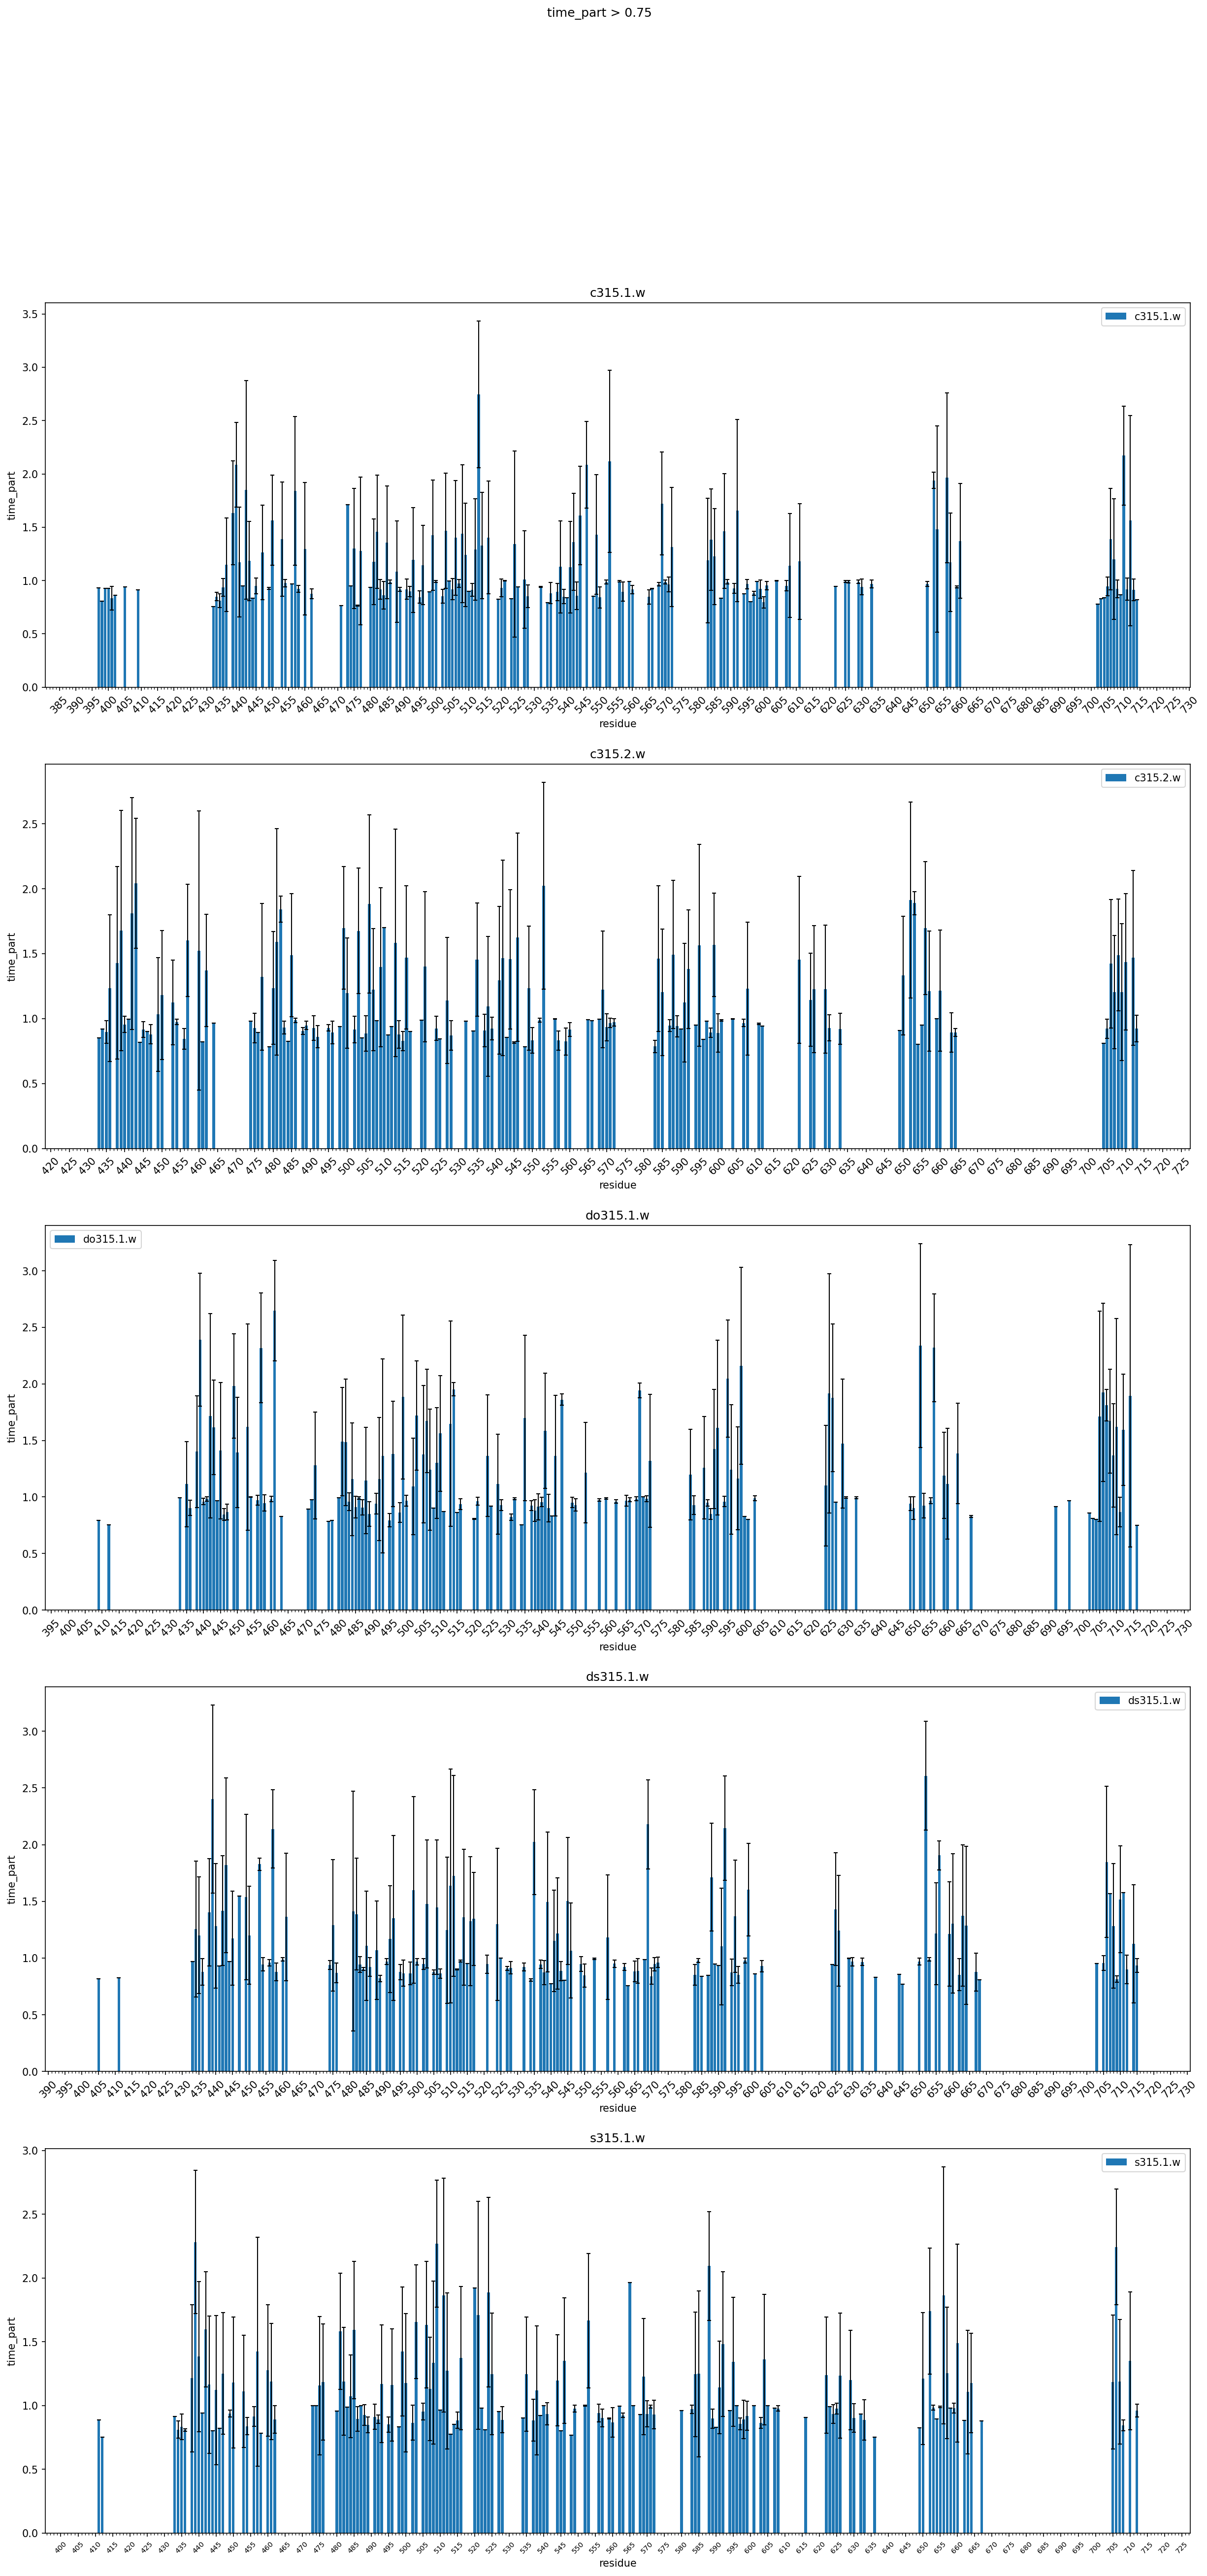

In [17]:
from matplotlib import ticker

fig, ax = plt.subplots(nrows = 5, ncols = 1)
fig.set_figwidth(20)
fig.set_figheight(40)
fig.set_dpi(150)
plt.xticks(rotation=90, size=7)


for i, system in enumerate(data_threshold_time_grouped.system.unique()):
    system_data = data_threshold_time_grouped.loc[data_threshold_time_grouped.system == system]
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].bar(x = system_data.residue, 
                   height = system_data.time_part['mean'], 
                   label = system)
    ax[i].errorbar(x = system_data.residue, 
                   y = system_data.time_part['mean'], 
                   yerr = system_data.time_part['std'], 
                   fmt='none',
                   c = 'black', 
                   elinewidth = 1,
                   capsize = 2)  
    ax[i].legend()
    ax[i].set_xlabel('residue')
    ax[i].set_ylabel('time_part')
    ax[i].set_title(system)
plt.suptitle('time_part > 0.75')

fig.show()

## Можно для каждого липида по отдельности

In [18]:
data_threshold_time.head()

,0,1,2,lipid_type,4,5,subunit,7,8,residue,time_part,system
0,4,53,0,POPC,1,1,1,591,MET,706,1.0,c315.1.w
1,5,240,0,POPE,1,1,1,342,LEU,457,1.0,c315.1.w
2,5,315,0,POPE,1,3,3,473,LEU,588,1.0,c315.1.w
3,8,582,0,SMP,1,3,3,438,LEU,553,1.0,c315.1.w
4,4,53,0,POPC,1,1,1,590,LYS,705,1.0,c315.1.w


In [9]:
data_threshold_time_lipids = data_threshold_time.groupby(['system', 'lipid_type', 'subunit', 'residue'], as_index=False) \
    .agg({'time_part':'sum'}) \
    .groupby(['system', 'lipid_type', 'residue'], as_index=False) \
    .agg({'time_part':['mean', 'std']}).fillna(0)
data_threshold_time_lipids.head()

system lipid_type residue time_part          
                                    mean       std
0  c315.1.w        CHL     436  0.901137  0.000000
1  c315.1.w        CHL     438  0.866892  0.000000
2  c315.1.w        CHL     439  0.929946  0.080688
3  c315.1.w        CHL     440  0.871266  0.000000
4  c315.1.w        CHL     442  0.998375  0.000000

<ipython-input-25-d5176f812436>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


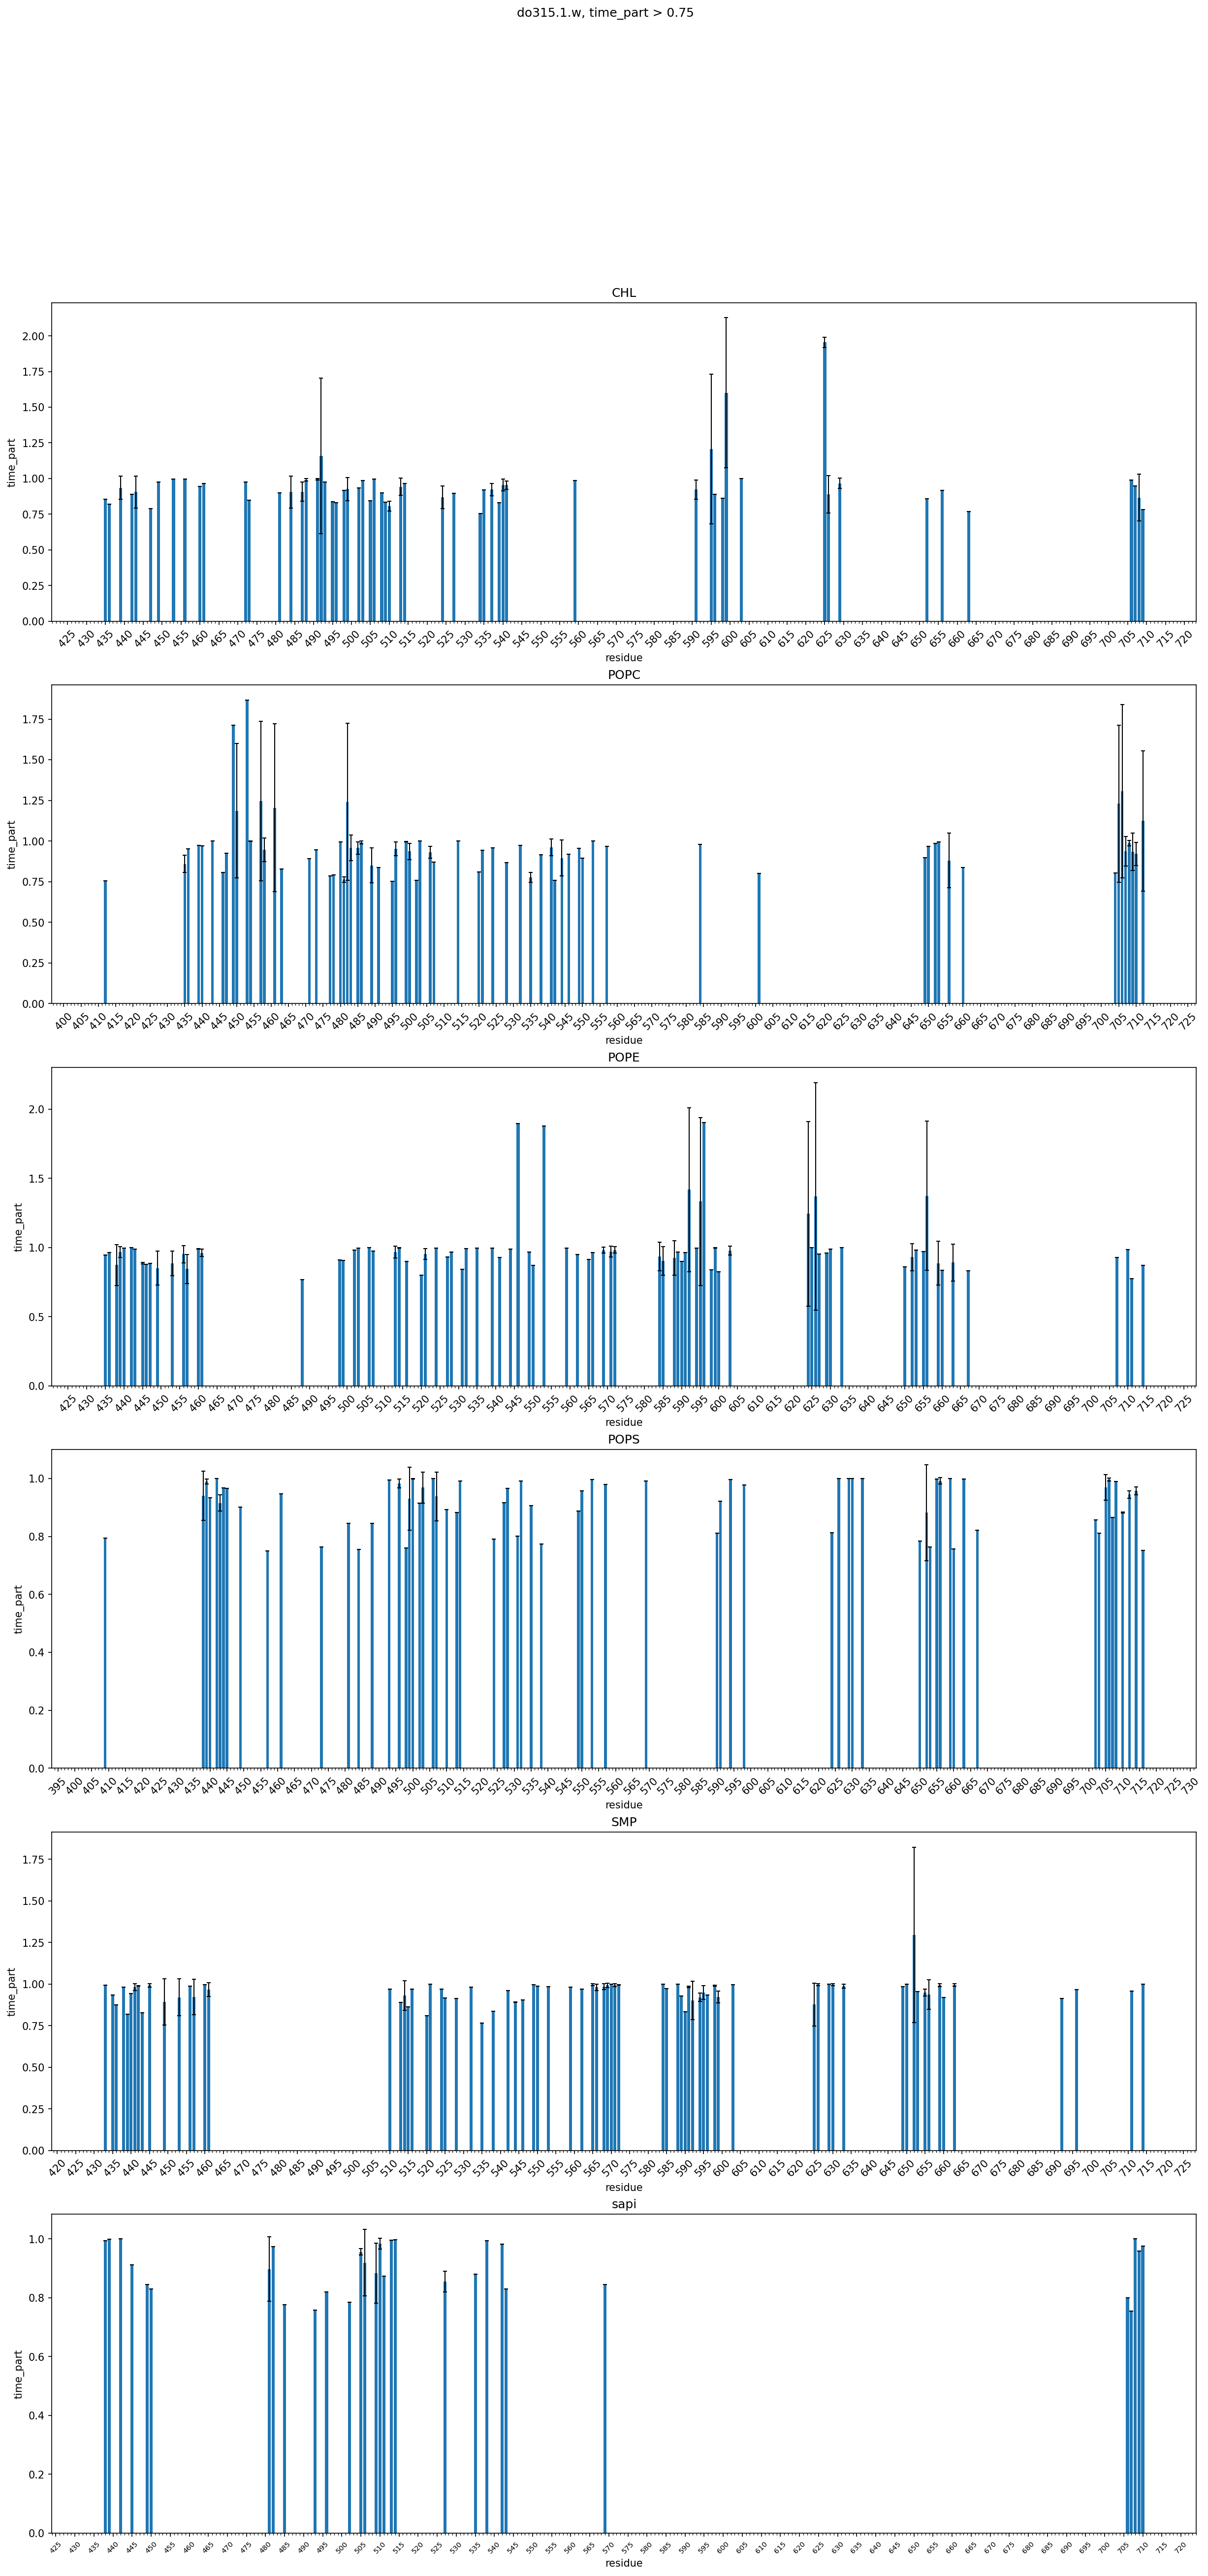

In [25]:
from matplotlib import ticker

fig, ax = plt.subplots(nrows = 6, ncols = 1)
fig.set_figwidth(20)
fig.set_figheight(40)
fig.set_dpi(150)
plt.xticks(rotation=90, size=7)

data_system = data_threshold_time_lipids.loc[data_threshold_time_lipids.system == 'do315.1.w']
for i, lipid_type in enumerate(data_system.lipid_type.unique()):
    data_system_lipid = data_system.loc[data_system.lipid_type == lipid_type]
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].bar(x = data_system_lipid.residue, 
                   height = data_system_lipid.time_part['mean'])
    ax[i].errorbar(x = data_system_lipid.residue, 
                   y = data_system_lipid.time_part['mean'], 
                   yerr = data_system_lipid.time_part['std'], 
                   fmt='none',
                   c = 'black', 
                   elinewidth = 1,
                   capsize = 2)  
    ax[i].set_xlabel('residue')
    ax[i].set_ylabel('time_part')
    ax[i].set_title(lipid_type)
plt.suptitle('do315.1.w, time_part > 0.75')

fig.show()

In [13]:
# Почему у холестерина в 625 позиции такой высокий столбик
#Оказывается, там два холестерина подолгу сидят
data.loc[(data.residue==625)&(data.system=='do315.1.w')&(data.lipid_type=='CHL')]

,0,1,2,lipid_type,4,5,subunit,7,8,residue,time_part,system
160,9,712,0,CHL,1,0,0,511,PHE,625,0.992126,do315.1.w
189,9,737,0,CHL,1,0,0,511,PHE,625,0.987502,do315.1.w
261,9,738,0,CHL,1,3,3,511,PHE,625,0.970254,do315.1.w
301,9,742,0,CHL,1,3,3,511,PHE,625,0.959505,do315.1.w
586,9,736,0,CHL,1,2,2,511,PHE,625,0.744782,do315.1.w
956,9,739,0,CHL,1,1,1,511,PHE,625,0.444944,do315.1.w
4760,9,839,0,CHL,1,2,2,511,PHE,625,0.003250,do315.1.w
6832,9,810,0,CHL,1,1,1,511,PHE,625,0.000125,do315.1.w


<ipython-input-29-07ffb51956eb>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


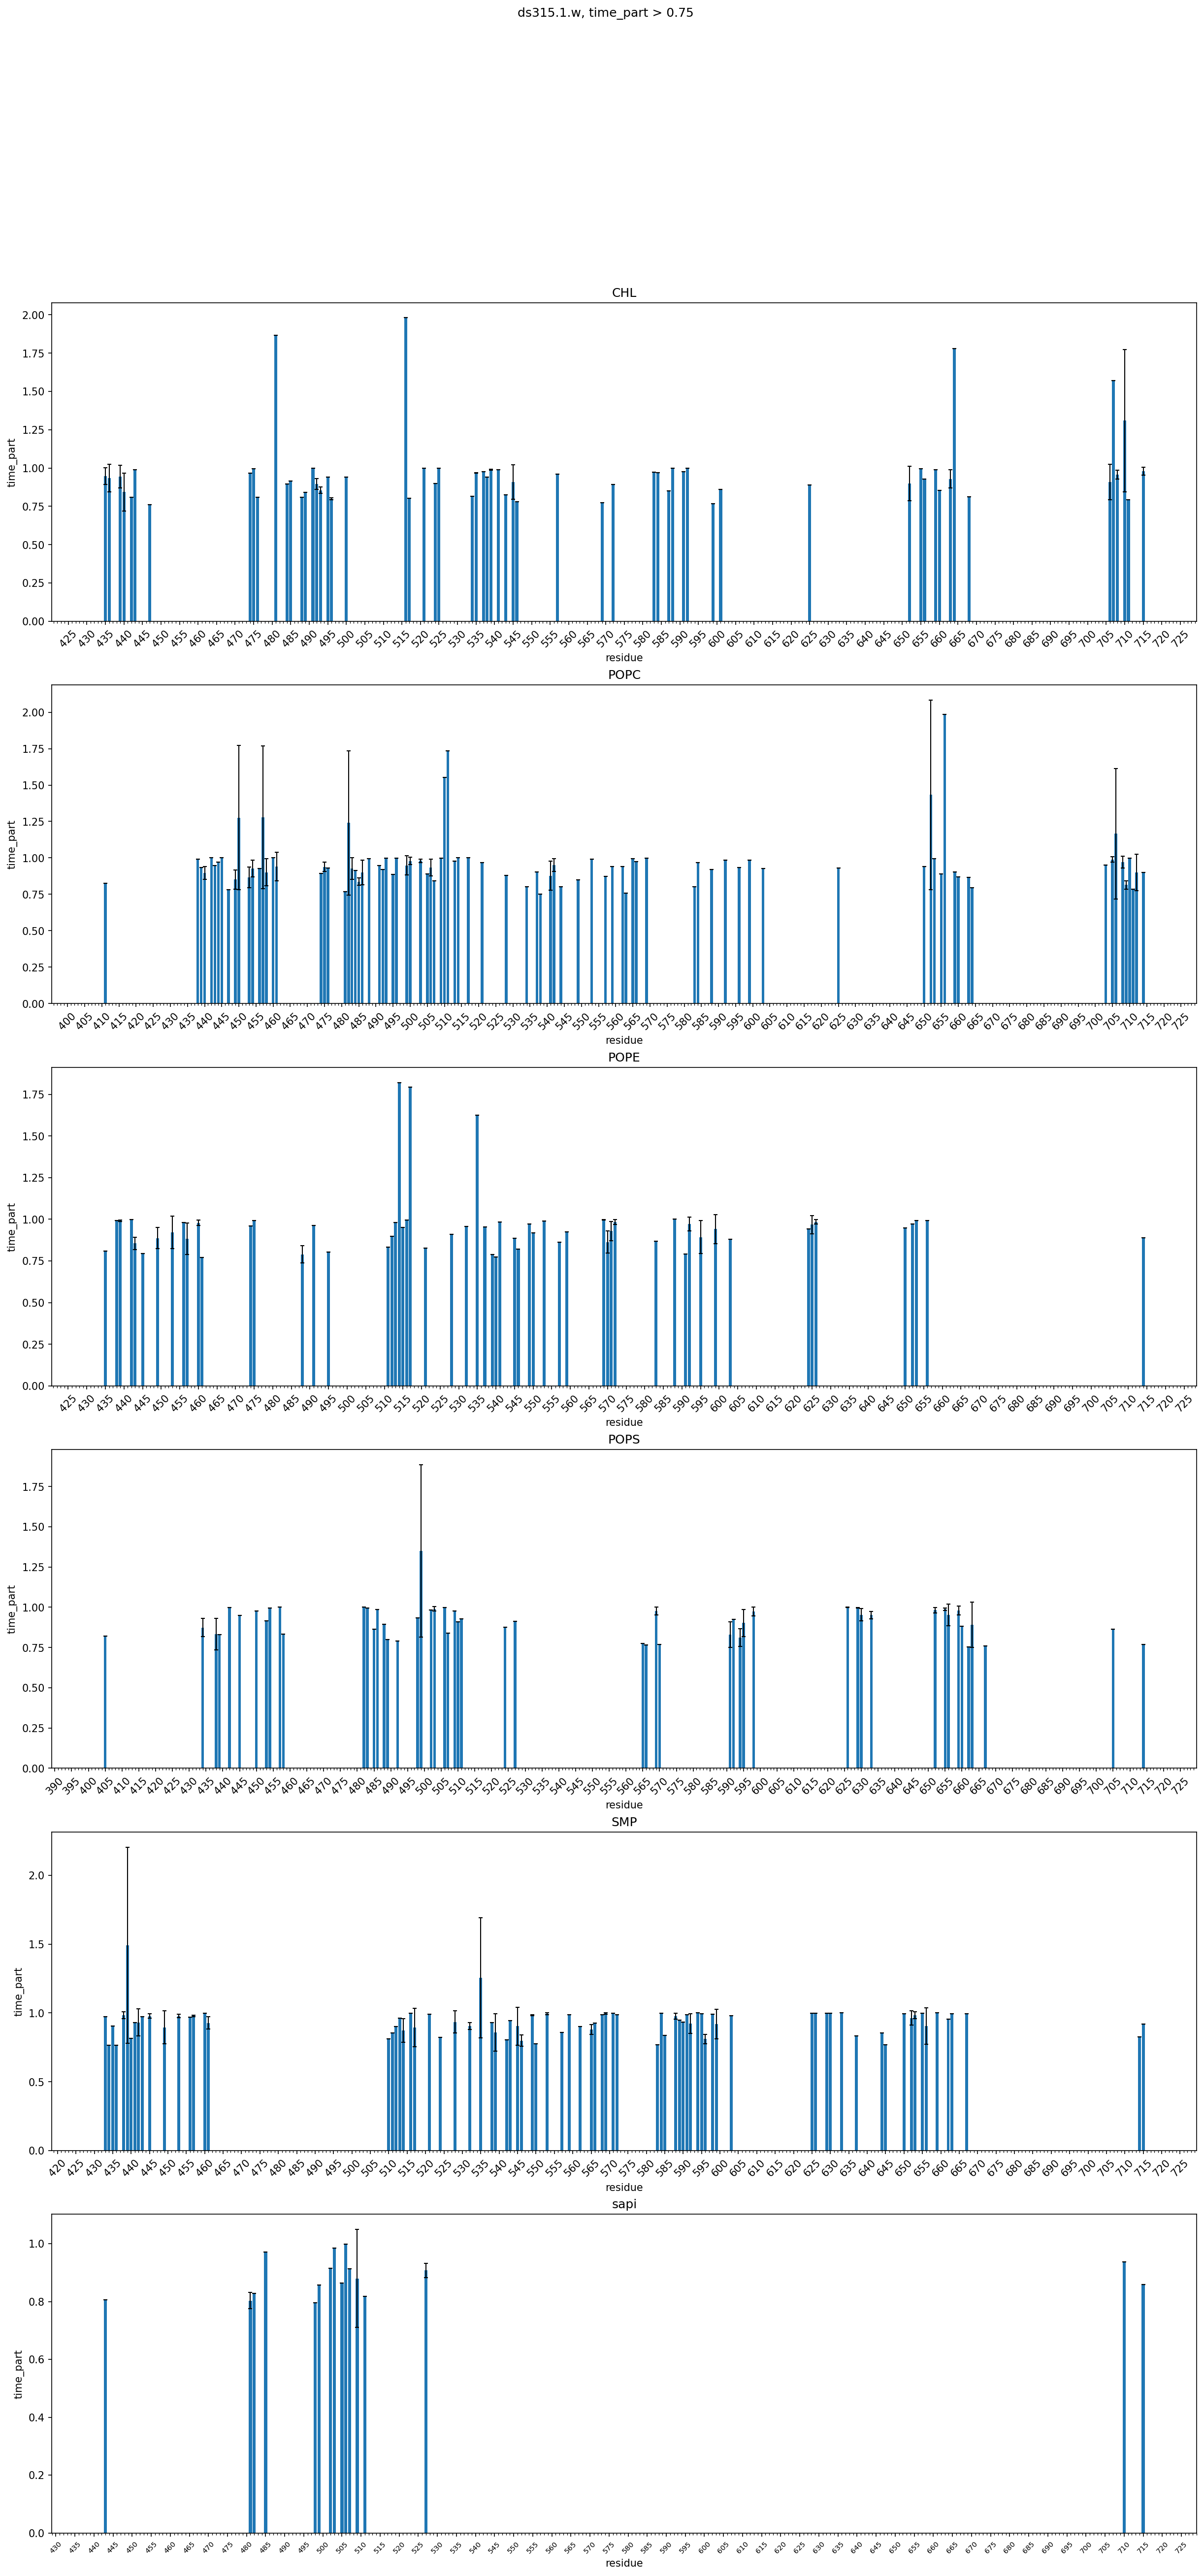

In [29]:
from matplotlib import ticker

fig, ax = plt.subplots(nrows = 6, ncols = 1)
fig.set_figwidth(20)
fig.set_figheight(40)
fig.set_dpi(150)
plt.xticks(rotation=90, size=7)

data_system = data_threshold_time_lipids.loc[data_threshold_time_lipids.system == 'ds315.1.w']
for i, lipid_type in enumerate(data_system.lipid_type.unique()):
    data_system_lipid = data_system.loc[data_system.lipid_type == lipid_type]
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].bar(x = data_system_lipid.residue, 
                   height = data_system_lipid.time_part['mean'])
    ax[i].errorbar(x = data_system_lipid.residue, 
                   y = data_system_lipid.time_part['mean'], 
                   yerr = data_system_lipid.time_part['std'], 
                   fmt='none',
                   c = 'black', 
                   elinewidth = 1,
                   capsize = 2)  
    ax[i].set_xlabel('residue')
    ax[i].set_ylabel('time_part')
    ax[i].set_title(lipid_type)
plt.suptitle('ds315.1.w, time_part > 0.75')

fig.show()

In [16]:
data_threshold_time_lipids.columns = ['system', 'lipid_type' ,'residue', 'time_part_mean', 'time_part_std']

In [20]:
data_threshold_time_grouped.columns = ['system','residue', 'time_part_mean', 'time_part_std']

In [25]:
data_threshold_time_lipids.to_csv('threshold075_lipsep.csv', index=False)

In [26]:
data_threshold_time_grouped.to_csv('threshold075_lipsum.csv', index=False)

# Сделаем то же самое на водородные связи

In [9]:
!dir .\lipid_data /b

c315.1.w_cont_dc_ft.csv
c315.1.w_cont_hbond_hb_ft.csv
c315.2.w_cont_dc_ft.csv
c315.2.w_cont_hbond_hb_ft.csv
do315.1.w_cont_dc_ft.csv
do315.1.w_cont_hbond_hb_ft.csv
ds315.1.w_cont_dc_ft.csv
ds315.1.w_cont_hbond_hb_ft.csv
s315.1.w_cont_dc_ft.csv
s315.1.w_cont_hbond_hb_ft.csv


In [21]:
c3151w_hb=pd.read_csv('lipid_data/c315.1.w_cont_hbond_hb_ft.csv', header=None, sep='\s+').drop(columns=5)
c3151w_hb.columns = list(i for i in range(0, 11))
c3151w_hb[10] = c3151w_hb[10].apply(lambda x:x[1:]).astype(float)
c3151w_hb['system']='c315.1.w'
c3151w_hb = c3151w_hb.rename(columns={1:'lipid_number', 3:'lipid_type', 6: 'subunit', 8:'restype', 9:'residue', 10:'time_part'})
                      

c3152w_hb=pd.read_csv('lipid_data/c315.2.w_cont_hbond_hb_ft.csv', header=None, sep='\s+').drop(columns=5)
c3152w_hb.columns = list(i for i in range(0, 11))
c3152w_hb[10] = c3152w_hb[10].apply(lambda x:x[1:]).astype(float)
c3152w_hb['system']='c315.2.w'
c3152w_hb = c3152w_hb.rename(columns={1:'lipid_number', 3:'lipid_type', 6: 'subunit', 8:'restype', 9:'residue', 10:'time_part'})

ds3151w_hb=pd.read_csv('lipid_data/ds315.1.w_cont_hbond_hb_ft.csv', header=None, sep='\s+').drop(columns=5)
ds3151w_hb.columns = list(i for i in range(0, 11))
ds3151w_hb[10] = ds3151w_hb[10].apply(lambda x:x[1:]).astype(float)
ds3151w_hb['system']='ds315.1.w'
ds3151w_hb = ds3151w_hb.rename(columns={1:'lipid_number', 3:'lipid_type', 6: 'subunit', 8:'restype', 9:'residue', 10:'time_part'})

s3151w_hb=pd.read_csv('lipid_data/s315.1.w_cont_hbond_hb_ft.csv', header=None, sep='\s+').drop(columns=5)
s3151w_hb.columns = list(i for i in range(0, 11))
s3151w_hb[10] = s3151w_hb[10].apply(lambda x:x[1:]).astype(float)
s3151w_hb['system']='s315.1.w'
s3151w_hb = s3151w_hb.rename(columns={1:'lipid_number', 3:'lipid_type', 6: 'subunit', 8:'restype', 9:'residue', 10:'time_part'})

do3151w_hb=pd.read_csv('lipid_data/do315.1.w_cont_hbond_hb_ft.csv', header=None, sep='\s+').drop(columns=5)
do3151w_hb.columns = list(i for i in range(0, 11))
do3151w_hb[10] = do3151w_hb[10].apply(lambda x:x[1:]).astype(float)
do3151w_hb['system']='do315.1.w'
do3151w_hb = do3151w_hb.rename(columns={1:'lipid_number', 3:'lipid_type', 6: 'subunit', 8:'restype', 9:'residue', 10:'time_part'})

In [22]:
data_hb_raw = pd.concat([c3151w_hb, c3152w_hb, ds3151w_hb, s3151w_hb, do3151w_hb])

In [24]:
data_hb_raw.to_csv('TRPV3_lipids_hbonds.csv', index=False)

In [13]:
print(data_hb_raw.lipid_type.unique())
print(data_hb_raw.system.unique())

['POPE' 'SMP' 'POPC' 'POPS' 'sapi' 'CHL']
['c315.1.w' 'c315.2.w' 'ds315.1.w' 's315.1.w' 'do315.1.w']


In [31]:
data_hb_threshold_time = data_hb_raw.loc[data_hb_raw.time_part >= 0.75]
print(data_hb_threshold_time.shape)

(110, 12)


In [32]:
data_hb_threshold_time.head()

,0,1,2,lipid_type,4,5,subunit,7,restype,residue,time_part,system
0,5,315,0,POPE,1,0,0,456,SER,571,0.999750,c315.1.w
1,8,554,0,SMP,1,1,1,456,SER,571,0.998000,c315.1.w
2,4,73,0,POPC,1,0,0,394,ARG,509,0.995001,c315.1.w
3,8,548,0,SMP,1,2,2,598,SER,713,0.981252,c315.1.w
4,8,548,0,SMP,1,2,2,597,ARG,712,0.945632,c315.1.w


In [33]:
data_hb_threshold_time_grouped = data_hb_threshold_time.groupby(['system', 'subunit', 'restype', 'residue'], as_index=False) \
    .agg({'time_part':'sum'}) \
    .groupby(['system', 'residue', 'restype'], as_index=False) \
    .agg({'time_part':['mean', 'std']}).fillna(0)
data_hb_threshold_time_grouped.columns = ['system', 'residue', 'restype', 'time_part_mean', 'time_part_std']

In [34]:
data_hb_threshold_time_grouped.head()

,system,residue,restype,time_part_mean,time_part_std
0,c315.1.w,399,THR,0.760905,0.0
1,c315.1.w,401,ASN,0.793901,0.0
2,c315.1.w,405,GLU,0.930884,0.0
3,c315.1.w,438,LYS,1.622922,0.0
4,c315.1.w,462,ARG,0.812273,0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


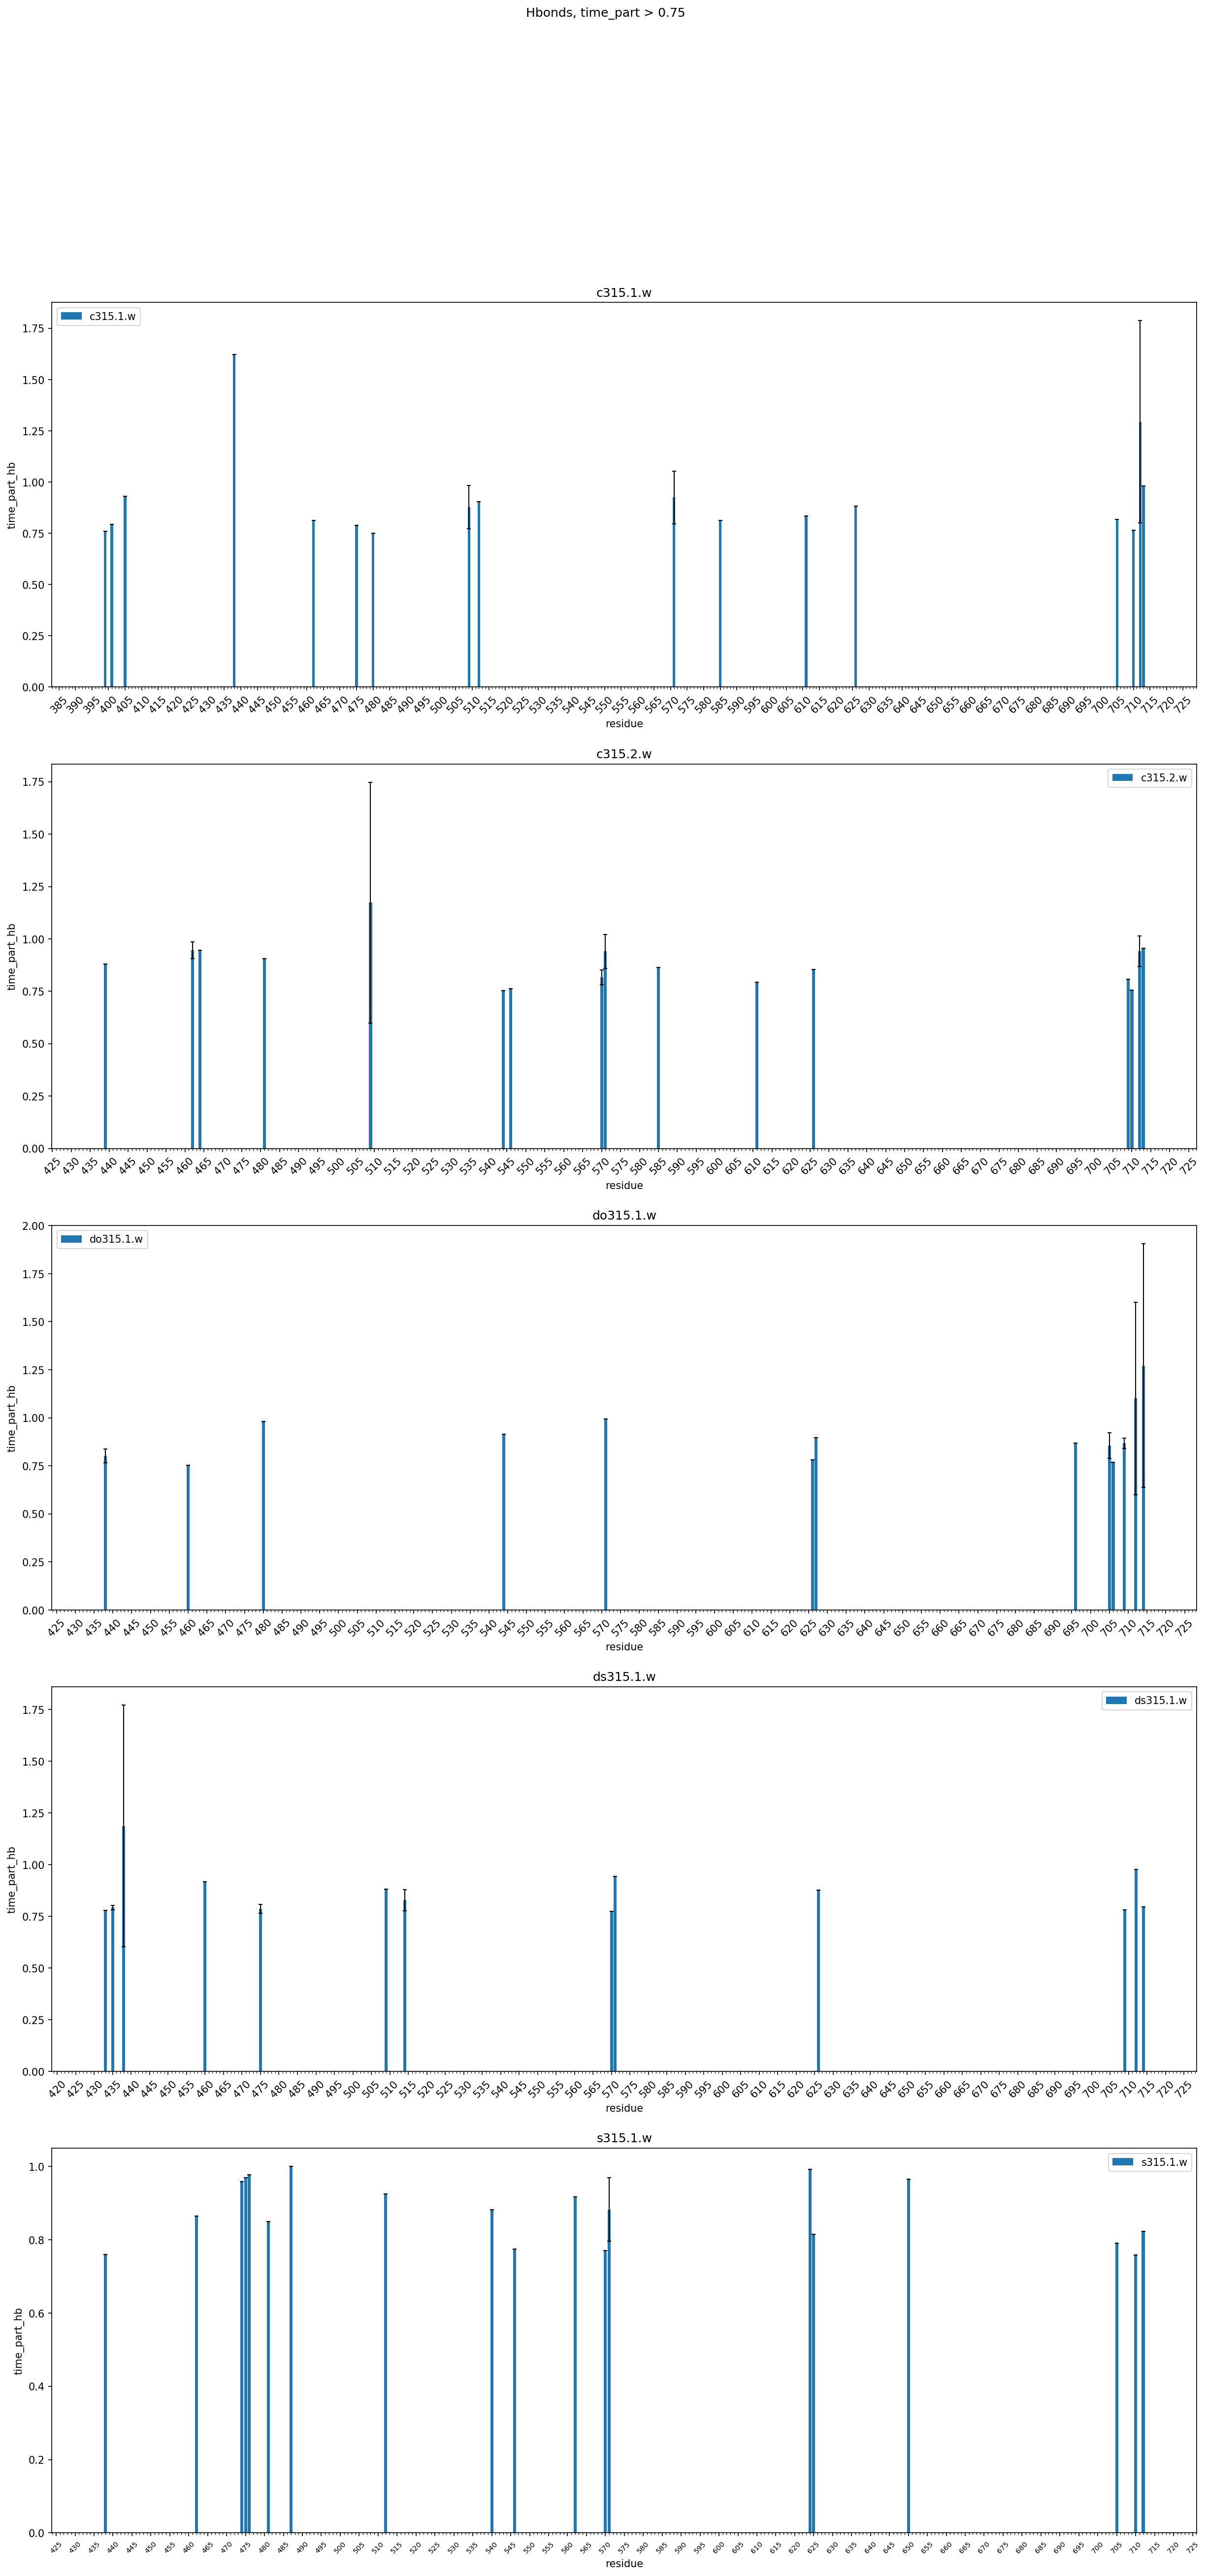

In [19]:
from matplotlib import ticker

fig, ax = plt.subplots(nrows = 5, ncols = 1)
fig.set_figwidth(20)
fig.set_figheight(40)
fig.set_dpi(150)
plt.xticks(rotation=90, size=7)

for i, system in enumerate(data_hb_threshold_time_grouped.system.unique()):
    system_data = data_hb_threshold_time_grouped.loc[data_hb_threshold_time_grouped.system == system]
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].bar(x = system_data.residue, 
                   height = system_data.time_part_mean, 
                   label = system)
    ax[i].errorbar(x = system_data.residue, 
                   y = system_data.time_part_mean, 
                   yerr = system_data.time_part_std, 
                   fmt='none',
                   c = 'black', 
                   elinewidth = 1,
                   capsize = 2)  
    ax[i].legend()
    ax[i].set_xlabel('residue')
    ax[i].set_ylabel('time_part_hb')
    ax[i].set_title(system)
plt.suptitle('Hbonds, time_part > 0.75')

fig.show()

А если посмотреть остатки, которые контактируют с липидами во всех системах и нарисовать только их

In [35]:
#ебашим
data_hb_s = data_hb_threshold_time_grouped.loc[data_hb_threshold_time_grouped.system == 'c315.1.w']
for i, system in enumerate(data_hb_threshold_time_grouped.system.unique()):
    data_s = data_hb_threshold_time_grouped.loc[data_hb_threshold_time_grouped.system == system]
    data_hb_s = data_hb_s.merge(data_s[['residue', 'restype', 'time_part_mean']], on=['residue', 'restype'], how='inner')
data_hb_s['time_part_agg'] = data_hb_s[['time_part_mean_x','time_part_mean_y']].mean(axis=1)
data_hb_s = data_hb_s[['residue', 'restype', 'time_part_agg']]

In [36]:
data_hb_s

,residue,restype,time_part_agg
0,571,SER,0.935036
1,712,ARG,1.071547


## Попробуем так же с контктами

In [109]:
data_threshold_time_grouped

system residue restype time_part          
                                   mean       std
0    c315.1.w     397     THR  0.929759  0.000000
1    c315.1.w     398     THR  0.806774  0.000000
2    c315.1.w     399     THR  0.928134  0.000000
3    c315.1.w     400     ASP  0.928259  0.000000
4    c315.1.w     401     ASN  0.834208  0.112151
..        ...     ...     ...       ...       ...
716  s315.1.w     706     MET  2.242782  0.453653
717  s315.1.w     707     LEU  1.186164  0.489947
718  s315.1.w     708     PRO  0.843488  0.043516
719  s315.1.w     710     TRP  1.350487  0.539884
720  s315.1.w     712     ARG  0.961255  0.050729

[721 rows x 5 columns]

In [110]:
data_threshold_time_grouped.columns = ['system','residue','restype','time_part_mean','time_part_std']

In [111]:
data_threshold_time_grouped

,system,residue,restype,time_part_mean,time_part_std
0,c315.1.w,397,THR,0.929759,0.000000
1,c315.1.w,398,THR,0.806774,0.000000
2,c315.1.w,399,THR,0.928134,0.000000
3,c315.1.w,400,ASP,0.928259,0.000000
4,c315.1.w,401,ASN,0.834208,0.112151
...,...,...,...,...,...
716,s315.1.w,706,MET,2.242782,0.453653
717,s315.1.w,707,LEU,1.186164,0.489947
718,s315.1.w,708,PRO,0.843488,0.043516
719,s315.1.w,710,TRP,1.350487,0.539884


In [129]:
data_cont_s = data_threshold_time_grouped.loc[data_threshold_time_grouped.system == 'c315.1.w']
for system in data_threshold_time_grouped.system.unique():
    data_s = data_threshold_time_grouped.loc[data_threshold_time_grouped.system == system]
    data_cont_s = data_cont_s.merge(data_s[['residue', 'restype', 'time_part_mean']], on=['residue', 'restype'], how='inner')
data_cont_s['time_part_agg'] = data_cont_s[['time_part_mean_x','time_part_mean_y']].mean(axis=1)
data_cont_s['time_part_agg_std'] = data_cont_s[['time_part_mean_x','time_part_mean_y']].std(axis=1)
data_cont_s = data_cont_s[['residue', 'restype', 'time_part_agg', 'time_part_agg_std']]

In [130]:
data_cont_s.head()

,residue,restype,time_part_agg,time_part_agg_std
0,433,TRP,0.904824,0.064548
1,435,LYS,0.985694,0.141167
2,436,PHE,1.020546,0.177958
3,438,LYS,1.453134,0.160618
4,439,TYR,2.154095,0.272093


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


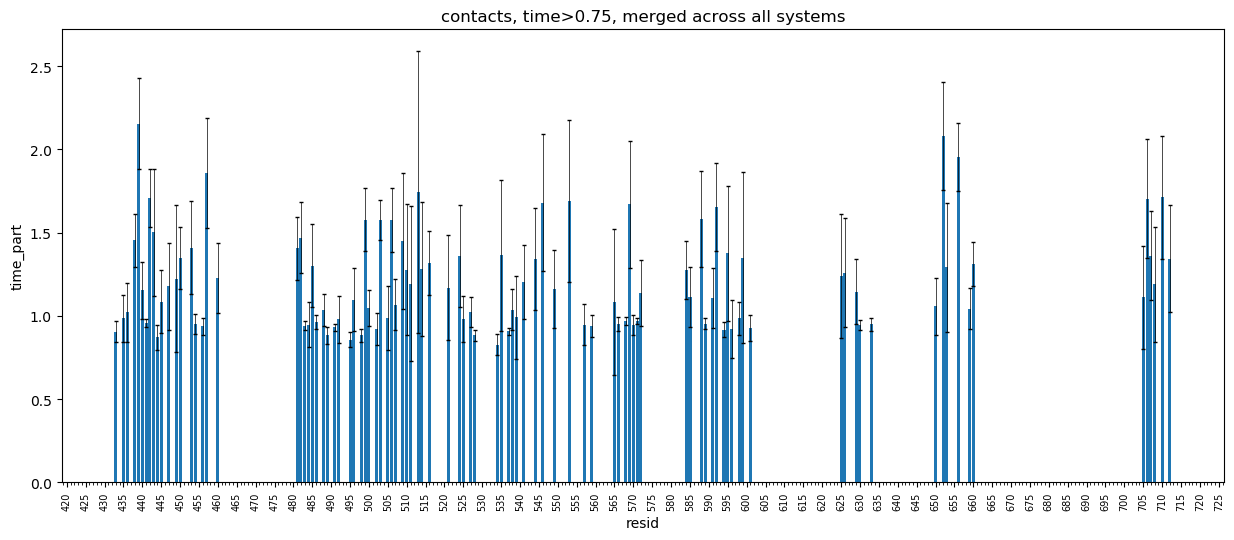

In [134]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
fig.set_dpi(100)
plt.xticks(rotation=90, size=7)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.bar(data_cont_s.residue, data_cont_s.time_part_agg)
ax.errorbar(x=data_cont_s.residue, y=data_cont_s.time_part_agg, yerr=data_cont_s.time_part_agg_std, fmt='none', elinewidth=0.5, capsize=1.5, color='black')
ax.set_xlabel('resid')
ax.set_ylabel('time_part')
ax.set_title('contacts, time>0.75, merged across all systems')

fig.show()

In [138]:
len(data_cont_s)

98

In [139]:
for system in data_threshold_time_grouped

,system,residue,restype,time_part_mean,time_part_std
0,c315.1.w,397,THR,0.929759,0.000000
1,c315.1.w,398,THR,0.806774,0.000000
2,c315.1.w,399,THR,0.928134,0.000000
3,c315.1.w,400,ASP,0.928259,0.000000
4,c315.1.w,401,ASN,0.834208,0.112151
...,...,...,...,...,...
716,s315.1.w,706,MET,2.242782,0.453653
717,s315.1.w,707,LEU,1.186164,0.489947
718,s315.1.w,708,PRO,0.843488,0.043516
719,s315.1.w,710,TRP,1.350487,0.539884


## Следующее задание

- Найти наидольше контактирующие остатки в ds315.1.w и do315.1.w  
- Покрасить их в соответствующих структурах
- И другим цветом водородные связи

In [29]:
data_threshold_time_grouped

system residue restype time_part          
                                   mean       std
0    c315.1.w     397     THR  0.929759  0.000000
1    c315.1.w     398     THR  0.806774  0.000000
2    c315.1.w     399     THR  0.928134  0.000000
3    c315.1.w     400     ASP  0.928259  0.000000
4    c315.1.w     401     ASN  0.834208  0.112151
..        ...     ...     ...       ...       ...
716  s315.1.w     706     MET  2.242782  0.453653
717  s315.1.w     707     LEU  1.186164  0.489947
718  s315.1.w     708     PRO  0.843488  0.043516
719  s315.1.w     710     TRP  1.350487  0.539884
720  s315.1.w     712     ARG  0.961255  0.050729

[721 rows x 5 columns]

In [37]:
data_hb_threshold_time_grouped

,system,residue,restype,time_part_mean,time_part_std
0,c315.1.w,399,THR,0.760905,0.0
1,c315.1.w,401,ASN,0.793901,0.0
2,c315.1.w,405,GLU,0.930884,0.0
3,c315.1.w,438,LYS,1.622922,0.0
4,c315.1.w,462,ARG,0.812273,0.0
...,...,...,...,...,...
73,s315.1.w,625,PHE,0.815023,0.0
74,s315.1.w,650,TYR,0.965504,0.0
75,s315.1.w,705,LYS,0.790901,0.0
76,s315.1.w,710,TRP,0.758030,0.0


In [40]:
for system in ['ds315.1.w', 'do315.1.w']:
    l = list(data_threshold_time_grouped.loc[data_threshold_time_grouped.system == system].residue)
    print('Structue {0}, contacts: {1}'.format(system, l), '\n')
    l_hb = list(data_hb_threshold_time_grouped.loc[data_hb_threshold_time_grouped.system == system].residue)
    print('Structue {0}, Hbonds: {1}'.format(system, l_hb), '\n\n')

Structue ds315.1.w, contacts: [405, 411, 433, 434, 435, 436, 438, 439, 440, 441, 442, 443, 444, 445, 447, 449, 450, 453, 454, 456, 457, 458, 460, 461, 474, 475, 476, 481, 482, 483, 484, 485, 486, 488, 489, 491, 492, 493, 495, 496, 498, 499, 500, 502, 503, 505, 506, 507, 509, 510, 511, 512, 513, 514, 515, 516, 517, 521, 524, 525, 527, 528, 532, 534, 535, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 549, 550, 553, 557, 559, 562, 563, 565, 566, 568, 569, 570, 571, 572, 583, 584, 585, 587, 588, 589, 590, 591, 592, 594, 595, 596, 598, 599, 601, 603, 624, 625, 626, 629, 630, 633, 637, 644, 645, 650, 652, 653, 655, 656, 659, 660, 662, 663, 664, 667, 668, 703, 705, 706, 707, 708, 709, 710, 711, 712, 714, 715] 

Structue ds315.1.w, Hbonds: [433, 435, 438, 460, 475, 509, 514, 570, 571, 626, 709, 712, 714] 


Structue do315.1.w, contacts: [409, 412, 433, 435, 436, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 449, 450, 453, 454, 456, 457, 458, 460, 461, 463, 471, 472, 473, 477, 478, 480,

In [44]:
set(a) & set(b)

{2, 4, 'ee', 'r'}

In [51]:
a = [409, 412, 433, 435, 436, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 449, 450, 453, 454, 456, 457, 458, 460, 461, 463, 471, 472, 473, 477, 478, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 491, 492, 493, 495, 496, 498, 499, 500, 502, 503, 505, 506, 507, 508, 509, 510, 511, 513, 514, 515, 516, 520, 521, 524, 525, 527, 528, 531, 532, 534, 535, 537, 538, 539, 540, 541, 542, 543, 544, 546, 549, 550, 553, 557, 559, 562, 565, 566, 568, 569, 570, 571, 572, 584, 585, 588, 589, 590, 591, 592, 594, 595, 596, 598, 599, 600, 601, 603, 624, 625, 626, 627, 629, 630, 633, 649, 650, 652, 653, 655, 656, 659, 660, 663, 667, 692, 696, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 714, 716] 
b = [438, 460, 480, 544, 571, 626, 627, 696, 705, 706, 709, 712, 714] 
c = list(set(a) & set(b))
print(len(c)==len(b))

True
